# Perceptron

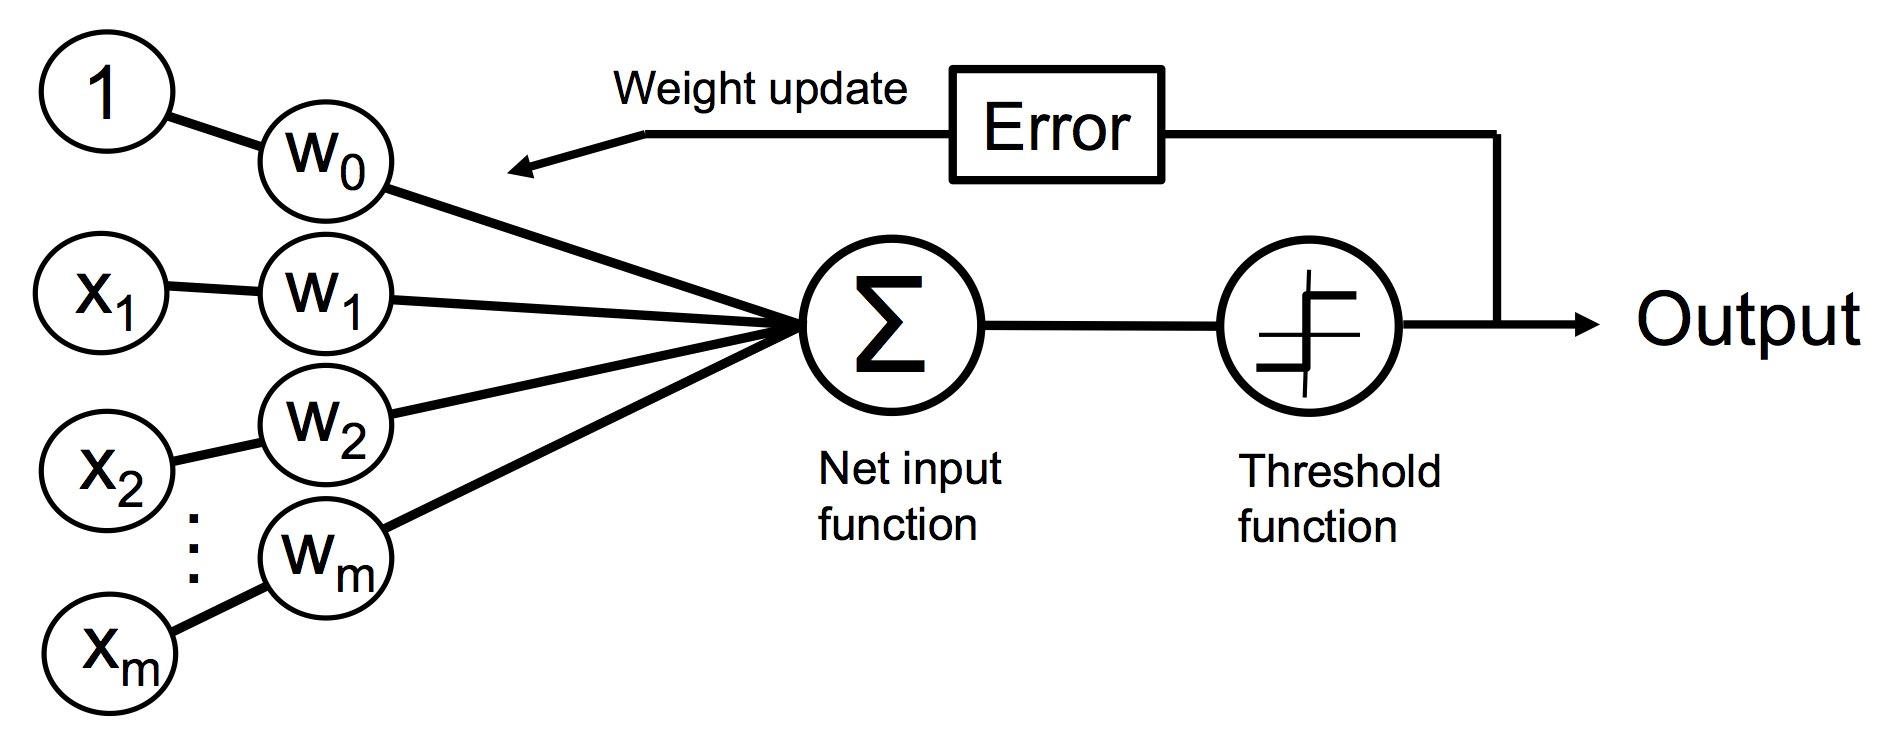

# Perceptron 으로 Iris 데이터 분류

Iris 데이터?
- iris(붓꽃) 데이터 셋으로 붓꽃의 3가지 종(setosa, versicolor, virginica)에 대해 꽃받침(꽃받침sepal과 꽃잎petal의 길이(CM)를 정리한 데이터
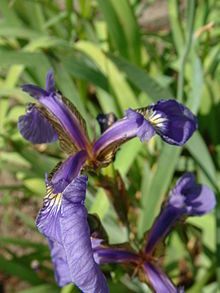


In [2]:
!pip install jupyterthemes

  Running setup.py bdist_wheel for prometheus-client: started
  Running setup.py bdist_wheel for prometheus-client: finished with status 'done'
  Stored in directory: C:\Users\p\AppData\Local\pip\Cache\wheels\22\9e\d9\2cb5acec1581d50cda94a8fe3cdc9c8313a97cae93b2b7f5db
Successfully built prometheus-client
  Found existing installation: notebook 5.5.0
    Uninstalling notebook-5.5.0:
      Successfully uninstalled notebook-5.5.0


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import Image
from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
jtplot.style(theme='grade3', grid=False)

## Dataset 확인

### Dataset 불러오기

In [4]:
iris = load_iris

1. data: 각 꽃의 특성(feature)이 담겨있습니다.
2. target: 각 행이 어떤 꽃을 나타내는지를 알려줍니다.
3. 0: Setosa, 1: Versicolor, 2: Virginica 
4. feature_names에는 data의 특성이 무엇을 의미하는지 알려준다.
    - sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, ‘petal width (cm)'
    - sepal: 꽃받침 / petal: 꽃잎

### data와 target 분리해서 저장

In [5]:
iris = load_iris() # sklearn의 load_iris로 iris dataset을 불러와 iris 변수에 저장
iris_features = iris['data'] # 꽃의 특성 (feature)이 담긴 iris['data']를 iris_feature 변수로 저장
iris_target = iris['target'] # 분류할 꽃의 종류가 담긴 iris['target']을 iris_target 변수로 저장

### Data Exploration

In [6]:
iris_dataset = pd.DataFrame(iris_features, columns = ["sepal_lenght", "sepal_width", "petal_length", "petal_width"])
iris_dataset["label"] = iris_target
iris_dataset["label"][iris_dataset["label"] == 0] = "setosa"
iris_dataset["label"][iris_dataset["label"] == 1] = "versicolor"
iris_dataset["label"][iris_dataset["label"] == 2] = "verginica"
iris_dataset["target"] = iris_target
iris_dataset.head()

C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sepal_lenght,sepal_width,petal_length,petal_width,label,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
iris_dataset[iris_dataset["label"] == "setosa"].describe() #데이터 값의 분포 확인 

,sepal_lenght,sepal_width,petal_length,petal_width,target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


In [8]:
label_hist = pd.value_counts(iris_dataset["label"].values)
pd.DataFrame({"lablel":label_hist})#lable 개수 count

,lablel
setosa,50
versicolor,50
verginica,50


In [9]:
X = iris_features[:100,:2] # feature 데이터 앞에서 부터 100개만 사용, sepal length와 sepal width만 사용
y = iris_target[:100] # target데이터 앞에서 부터 100개만 사용

### Scatter 그래프로 분포 확인

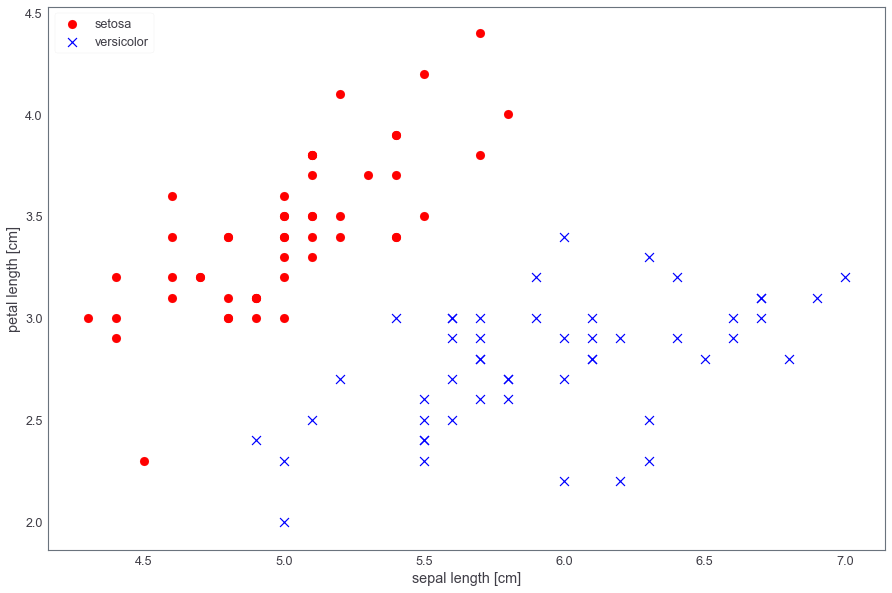

In [10]:
plt.figure(figsize = (15,10)) # plot의 그림 크기 설정
plt.scatter(X[:50, 0], X[:50, 1], # scatter(흩뿌리는) 그래프로 작성, 앞에 50개는 setosa, 0: sepal length, 1: petal length
            color='red', marker='o', label='setosa', s=80) 
            # color='red': 빨간색으로 표현, marker='o':동그라미로 표현, label='setosa': setosa로 분류
plt.scatter(X[50:100, 0], X[50:100, 1], # scatter 그래프로 작성, 뒤에 50개는 versicolor, 0: sepal length, 1: petal length
            color='blue', marker='x', label='versicolor', s=80)
            # color='blue': 파란색으로 표현, marker='x':엑스로 표현, label='versicolor': versicolor로 분류
# plot 그리기
plt.xlabel('sepal length [cm]') # x축 이름 설정
plt.ylabel('petal length [cm]') # y축 이름 설정
plt.legend(loc='upper left') # 범례 설정
# plt.savefig('images/02_06.png', dpi=300)
plt.show() # 그래프 출력

## Perceptron 설계

퍼셉트론 구현 3단계
1. 가중치를 0 혹은, 0에 가까운 임의의 작은 수로 초기화
2. 출력 값 y와 예측 값 y^를 비교
3. 오차를 감소시키는 방향으로 가중치 업데이트

### input 및 weights 설정

In [11]:
w = np.zeros(1 + X.shape[1]) # numpy읠 zeros 메소드를 통해 X의 크기만큼의 0으로 채워진 행렬 생성
input_signal = np.dot(X, w[1:]) + w[0] # summation 결과 생성
input_signal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
X.shape

(100, 2)

In [13]:
w[1:].shape

(2,)

In [14]:
input_signal.shape

(100,)

### Step Function 구현

In [16]:
def step_function(X): # stop function 구현
    return np.where(X >= 0.0, 1, 0)  # X (함수의 input)이 0.0보다 크면 1 아니면 0

## Perceptron으로 학습

In [17]:
errors = [] # error를 저장할 list
n_epochs = 100 # epoch할 수
for epoch in range(n_epochs): # epochs동안 반복
    print("{0}번째 반복 입니다".format(epoch))
    eta = 0.01 # learning rate
    index = 0 # 몇 번째 data를 사용할지 지정할 index
    pred_y = step_function(input_signal) # perceptron 계산값
    for xi, target in zip(X, y): # feature와 label의 총 길이만큼 반복하며 xi와 target에 하나씩 전달
        updated_w = eta * (target - pred_y[index]) # delta rule에 의해 갱신할 weight 계산
        w[0] += updated_w # 0번째 weight 갱신
        w[1:] += updated_w * xi # 나머지 wight 갱신
    errors.append(((y - pred_y).sum()) / 100) # target과 계산 결과를 비교
    index += 1 # index 증가
    input_signal = np.dot(X, w[1:]) + w[0] # 모든 data에 대한 학습이 끝난 후 게산
    print(((y - pred_y).sum())/100) # 결과 출력
    if ((y - pred_y).sum())/100 == 0: # error/100가 0이 나오면 종료
        break

0번째 반복 입니다
-0.5
1번째 반복 입니다
0.5
2번째 반복 입니다
-0.5
3번째 반복 입니다
0.5
4번째 반복 입니다
-0.5
5번째 반복 입니다
0.5
6번째 반복 입니다
-0.5
7번째 반복 입니다
0.5
8번째 반복 입니다
-0.5
9번째 반복 입니다
0.5
10번째 반복 입니다
-0.5
11번째 반복 입니다
0.5
12번째 반복 입니다
-0.5
13번째 반복 입니다
0.5
14번째 반복 입니다
-0.5
15번째 반복 입니다
0.5
16번째 반복 입니다
-0.5
17번째 반복 입니다
0.5
18번째 반복 입니다
-0.5
19번째 반복 입니다
0.5
20번째 반복 입니다
-0.5
21번째 반복 입니다
0.44
22번째 반복 입니다
-0.5
23번째 반복 입니다
0.19
24번째 반복 입니다
-0.5
25번째 반복 입니다
0.04
26번째 반복 입니다
-0.5
27번째 반복 입니다
-0.01
28번째 반복 입니다
-0.5
29번째 반복 입니다
-0.03
30번째 반복 입니다
-0.5
31번째 반복 입니다
-0.18
32번째 반복 입니다
-0.5
33번째 반복 입니다
-0.35
34번째 반복 입니다
0.5
35번째 반복 입니다
-0.42
36번째 반복 입니다
0.5
37번째 반복 입니다
-0.47
38번째 반복 입니다
0.5
39번째 반복 입니다
-0.5
40번째 반복 입니다
0.47
41번째 반복 입니다
-0.5
42번째 반복 입니다
0.44
43번째 반복 입니다
-0.5
44번째 반복 입니다
0.35
45번째 반복 입니다
-0.5
46번째 반복 입니다
0.19
47번째 반복 입니다
-0.5
48번째 반복 입니다
0.11
49번째 반복 입니다
-0.5
50번째 반복 입니다
0.04
51번째 반복 입니다
-0.5
52번째 반복 입니다
0.0


### Error 변화 확인

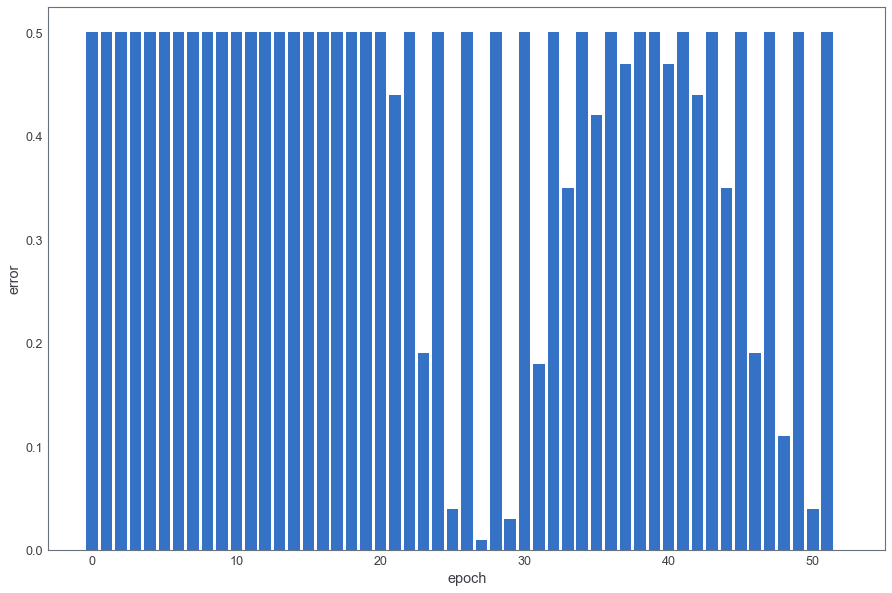

In [18]:
errors = np.array(errors)
epochs = np.arange(len(errors))
plt.figure(figsize=(15, 10))
plt.bar(epochs, abs(errors))
plt.xlabel('epoch') # x축 이름 설정
plt.ylabel('error') # y축 이름 설정
plt.show()

### Input의 Feature 수를 늘리면????!

In [28]:
X = iris_features[:100,:] # feature 데이터 앞에서 부터 100개만 사용
y = iris_target[:100] # target데이터 앞에서 부터 100개만 사용

### input 및 weights 설정

In [17]:
w = np.zeros(1 + X.shape[1]) # numpy읠 zeros 메소드를 통해 X의 크기만큼의 0으로 채워진 행렬 생성
input_signal = np.dot(X, w[1:]) + w[0] # summation 결과 생성

In [18]:
X.shape

(100, 2)

In [23]:
w[1:].shape

(2,)

In [24]:
w[1:].shape

(2,)

In [25]:
input_signal.shape

(100,)

### Step Function 구현

In [33]:
def step_function(X): # stop function 구현
    return np.where(X >= 0.0, 1, 0)  # X (함수의 input)이 0.0보다 크면 1 아니면 0

## Perceptron으로 학습

In [34]:
errors = [] # error를 저장할 list
n_epochs = 100 # epoch할 수
for epoch in range(n_epochs): # epochs동안 반복
    print("{0}번째 반복 입니다".format(epoch))
    eta = 0.01 # learning rate
    index = 0 # 몇 번째 data를 사용할지 지정할 index
    pred_y = step_function(input_signal) # perceptron 계산값
    for xi, target in zip(X, y): # feature와 label의 총 길이만큼 반복하며 xi와 target에 하나씩 전달
        updated_w = eta * (target - pred_y[index]) # delta rule에 의해 갱신할 weight 계산
        w[0] += updated_w # 0번째 weight 갱신
        w[1:] += updated_w * xi # 나머지 wight 갱신
    errors.append(((y - pred_y).sum()) / 100) # target과 계산 결과를 비교
    index += 1 # index 증가
    input_signal = np.dot(X, w[1:]) + w[0] # 모든 data에 대한 학습이 끝난 후 게산
    print(((y - pred_y).sum())/100) # 결과 출력
    if ((y - pred_y).sum())/100 == 0: # error/100가 0이 나오면 종료
        break

0번째 반복 입니다
-0.5
1번째 반복 입니다
0.5
2번째 반복 입니다
-0.5
3번째 반복 입니다
0.5
4번째 반복 입니다
-0.5
5번째 반복 입니다
0.5
6번째 반복 입니다
-0.5
7번째 반복 입니다
0.03
8번째 반복 입니다
-0.5
9번째 반복 입니다
0.0


### Error 변화 확인

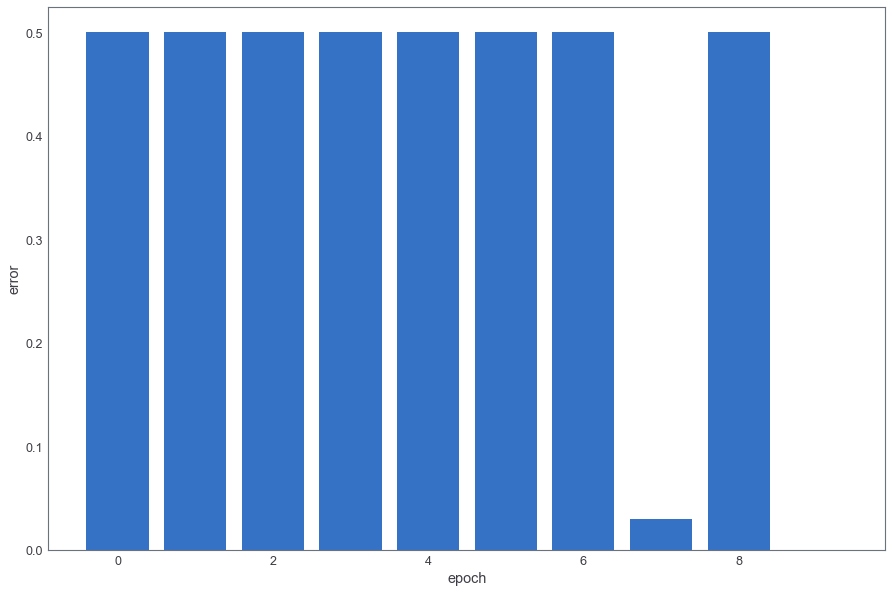

In [35]:
errors = np.array(errors)
epochs = np.arange(len(errors))
plt.figure(figsize=(15, 10))
plt.bar(epochs, abs(errors))
plt.xlabel('epoch') # x축 이름 설정
plt.ylabel('error') # y축 이름 설정
plt.show()

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
# iris: iris dataset 를 불러서 저장

iris = load_iris() # sklearn의 load_iris로 iris dataset을 불러와 iris 변수에 저장
iris_features = iris['data'] # 꽃의 특성 (feature)이 담긴 iris['data']를 iris_feature 변수로 저장
iris_target = iris['target'] # 분류할 꽃의 종류가 담긴 iris['target']을 iris_target 변수로 저장

X = iris_features[:100,:2] # feature 데이터 앞에서 부터 100개만 사용, sepallength와 sepal width만 사용
y = iris_target[:100] # target데이터 앞에서 부터 100개만 사용

per_clf = Perceptron(random_state=42) # sklearn의 perceptron을 설정
per_clf.fit(X, y) # perceptron으로 선택한 Data에 대해 fitting 학습

C:\Users\p\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [9]:
X.shape

(100, 2)

In [10]:
y_pred = per_clf.predict([[X[30,0], X[30,0]]]) # sepal width, sepal height를 입력으로 넣었을 때 예측 결과
print(y_pred, y[30])

[0] 0


In [11]:
X.shape

(100, 2)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
X[y==0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [14]:
X[y==0, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [15]:
X[y==0, 2]

IndexError: index 2 is out of bounds for axis 1 with size 2

C:\Users\p\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


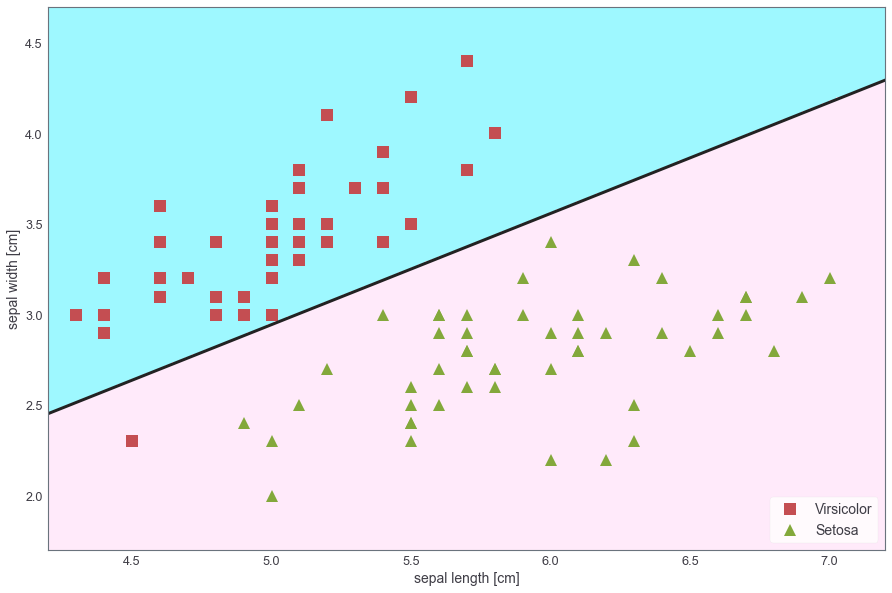

In [87]:
from matplotlib.colors import ListedColormap # matplot으로 임의의 색깔을 입히기 위한 라이브러리

plt.figure(figsize=(15, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "rs", label="Virsicolor", markersize=12)
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Setosa", markersize=12)
    
axes = [4.2, 7.2, 1.7, 4.7]
# Petal이면 왼쪽 범위 아니면 오른쪽 범위 사용; 영역을 나누는 경계선의 좌표

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )# 각 범위 별로 linspace를 생성하고 x0,과 x1이라는 면적의 좌표를 가진 grid를 생성

X_new = np.c_[x0.ravel(), x1.ravel()] # 면적의 좌표를 한 줄로 표시해서 새로운 input을 생성
y_predict = per_clf.predict(X_new) # 새로운 X에 대해서 예측을 수행
zz = y_predict.reshape(x0.shape) # 예측결과를 면적으로 변환

a = -(per_clf.coef_[0][0] / per_clf.coef_[0][1])
# perceptron.coef: 각 feature에 mapping된 weights
# [1, number of feature] n개 class면 [number of features, number of features]
# 여기선 class가 2이므로 [1, 2]의 형태, sepal width와 height에 대한 weight
b = -(per_clf.intercept_ / per_clf.coef_[0][1] )
# intercept: Constants in decision function
# class가 2개이면 1, n개 이면 n

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3) # 경계선 그리기
custom_cmap = ListedColormap(['#9ef8ff', '#ffeafa']) #면적의 색깔 선택, hex색깔

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=0) # 면적의 색에 맞게 색깔 입히기
plt.xlabel("sepal length [cm]", fontsize=14) # x축; sepal length
plt.ylabel("sepal width [cm]", fontsize=14) # y축: sepal width
plt.legend(loc="lower right", fontsize=14) # 범례 오른쪽 아래에 표시
plt.axis(axes) # 축 출력

plt.show() # 그래프 출력